In [1]:
import sys, os, time, shutil, random
from pathlib import Path
_cwd = os.getcwd()
os.chdir(Path(_cwd)/'..')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import omnibelt as belt
import omnifig as fig
import numpy as np
np.set_printoptions(linewidth=120)
%load_ext autoreload
%autoreload 2
# %pdb
import pickle
from tabulate import tabulate
from tqdm import tqdm_notebook as tqdm
import torch
from torch import nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
# import torchvision.models
from torch.utils.data import Dataset, DataLoader, TensorDataset

%matplotlib notebook
import matplotlib.pyplot as plt
#plt.switch_backend('Qt5Agg') #('Qt5Agg')
# import matplotlib.patches as mpatches
# import matplotlib.pyplot as plt
# import matplotlib.cm
# from matplotlib import animation
# import matplotlib as mpl
# # mpl.rc('image', cmap='gray')
# import seaborn as sns
# import pandas as pd
# from sklearn.preprocessing import normalize

fig.initialize();
# import gpumap
# from c3linearize import linearize, class_graph

In [2]:
import plethora

In [3]:
from plethora.datasets.toy import SwissRollDataset

In [13]:
dataset = SwissRollDataset(1000).load()
dataset

SwissRollDataset<None>[1000]

In [14]:
len(dataset)

1000

In [15]:
X = dataset.get_observation()
Y = dataset.get_label()
X.shape, Y.shape

(torch.Size([1000, 3]), torch.Size([1000, 2]))

In [16]:
dataset.freq

0.5

In [17]:
# plt.figure()
# plt.plot(*Y.t(), ls='',marker='.');

<IPython.core.display.Javascript object>


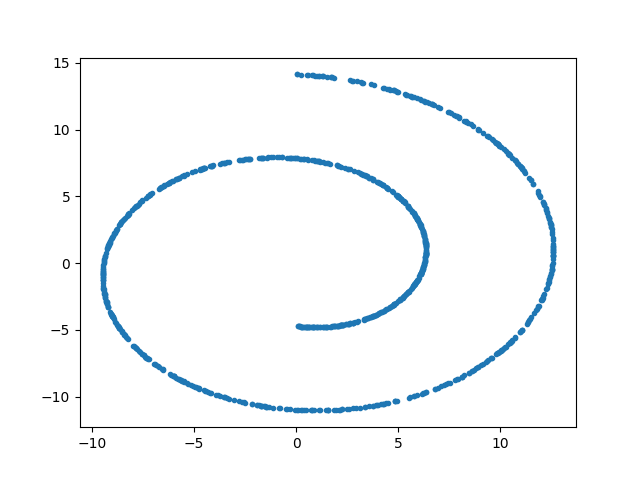

In [18]:
plt.figure()
plt.plot(*X[:,[0,2]].t(), ls='',marker='.');

In [19]:
from sklearn.datasets import make_swiss_roll

In [20]:
bX, _ = make_swiss_roll(1000)
bX.shape

(1000, 3)

<IPython.core.display.Javascript object>


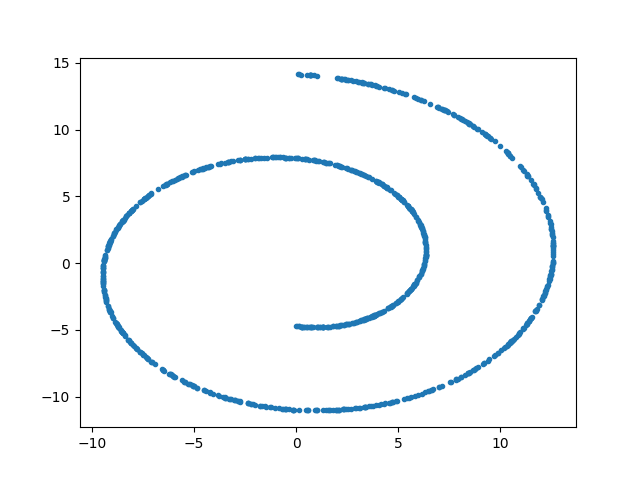

In [21]:
plt.figure()
plt.plot(*bX[:,[0,2]].T, ls='',marker='.');

In [7]:
lbl = dataset.generate_mechanism(10)
lbl

tensor([[6.7685, 0.0165],
        [8.6537, 0.5757],
        [7.4921, 0.5531],
        [5.4965, 0.5968],
        [7.4222, 0.8231],
        [7.4931, 0.1936],
        [4.6091, 0.7376],
        [3.5847, 0.0984],
        [5.7974, 0.7874],
        [8.1636, 0.5432]])

In [8]:
dataset.generate_observation_from_mechanism(lbl)

tensor([[-20.6409,   0.3474,  -5.1097],
        [-10.2236,  12.0894, -25.1909],
        [-19.3667,  11.6150, -13.3761],
        [-15.9491,  12.5323,   6.6183],
        [-19.6371,  17.2852, -12.5737],
        [-19.3625,   4.0665, -13.3881],
        [ -9.6970,  15.4897,  10.7536],
        [ -2.4747,   2.0669,  10.9864],
        [-17.6784,  16.5344,   4.3806],
        [-15.1215,  11.4067, -20.7147]])